In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [5]:
os.listdir("./tmp/")

['kagglecatsanddogs_5340.zip']

In [6]:
local_zip = './tmp/kagglecatsanddogs_5340.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [11]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
    """
    Creates directories for the train and test sets

    Args:
    root_path (string) - the base directory path to create subdirectories from

    Returns:
    None
    """  
    ### START CODE HERE

    # HINT:
    # Use os.makedirs to create your directories with intermediate subdirectories
    # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
    if not os.path.exists(root_dir):
        os.mkdir(root_path)
    for i in ['training','validation']:
        os.mkdir(os.path.join(root_path,i))
        for subdir in ['cats','dogs']:
            os.mkdir(os.path.join(root_path,i,subdir))
        

  ### END CODE HERE

  
try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed befehand")

In [12]:
# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs\training
/tmp/cats-v-dogs\validation
/tmp/cats-v-dogs\training\cats
/tmp/cats-v-dogs\training\dogs
/tmp/cats-v-dogs\validation\cats
/tmp/cats-v-dogs\validation\dogs


In [43]:
import numpy as np
# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    """
    Splits the data into train and test sets

    Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

    Returns:
    None

    """

    ### START CODE HERE
    source_list = os.listdir(SOURCE_DIR)
    print(len(source_list))
    #source_list = source_list.pop(i) if os.path.getsize(os.path.join(SOURCE_DIR,source_list[i])) <0 for i in source_list 
    for i in source_list:
        if (os.path.getsize(os.path.join(SOURCE_DIR,i)) <=0):
            source_list.remove(i)
            print("filename {name} is zero length, so ignoring.".format(name=i))
    print(len(source_list)) 
    
    source_list = random.sample(source_list,len(source_list))
    
    train_list, test_list = np.split(source_list,[int(len(source_list)*SPLIT_SIZE)])
    print(len(train_list))
    print(len(test_list))
    for i in train_list:
        #print(os.path.join(SOURCE_DIR,i))
        #print(TRAINING_DIR)
        shutil.copy(os.path.join(SOURCE_DIR,i),TRAINING_DIR)
        
    for i in test_list:
        shutil.copy(os.path.join(SOURCE_DIR,i),VALIDATION_DIR)        
            
    ### END CODE HERE

In [44]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

12501
filename 666.jpg is zero length, so ignoring.
12500
11250
1250
12501
filename 11702.jpg is zero length, so ignoring.
12500
11250
1250


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [75]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    """
    Creates the training and validation data generators

    Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

    Returns:
    train_generator, validation_generator - tuple containing the generators
    """
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    train_datagen = ImageDataGenerator( rescale = 1.0/255. )

    # Pass in the appropiate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=200,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

    # Pass in the appropiate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    ### END CODE HERE
    return train_generator, validation_generator

In [76]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [77]:
# GRADED FUNCTION: create_model
def create_model():
    # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
    # USE AT LEAST 3 CONVOLUTION LAYERS

    ### START CODE HERE

    model = tf.keras.models.Sequential([ 
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])


    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy']) 

    ### END CODE HERE

    return model

In [79]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=4,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/4
113/113 [==============================] - 291s 3s/step - loss: 1.7856 - accuracy: 0.5381 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/4
113/113 [==============================] - 288s 3s/step - loss: 0.6789 - accuracy: 0.5574 - val_loss: 0.6634 - val_accuracy: 0.6088
Epoch 3/4
113/113 [==============================] - 284s 3s/step - loss: 0.6559 - accuracy: 0.6095 - val_loss: 0.6574 - val_accuracy: 0.6008
Epoch 4/4
113/113 [==============================] - 280s 2s/step - loss: 0.6135 - accuracy: 0.6626 - val_loss: 0.6212 - val_accuracy: 0.6620


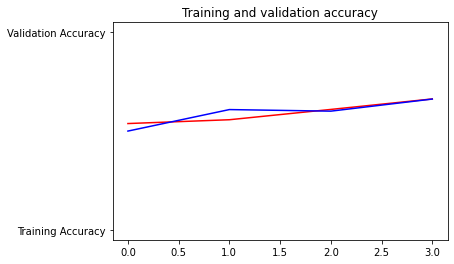

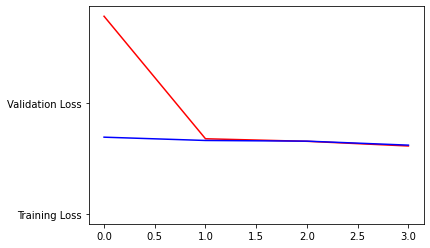

In [80]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [42]:
a.pop[4]

TypeError: 'builtin_function_or_method' object is not subscriptable